# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | jaciara
Processing Record 4 of Set 1 | la passe
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | serinyol
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | wasco
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | thunder bay
Processing Record 15 of Set 1 | quellon
Processing Record 16 of Set 1 | acapulco de juarez
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | kawant
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | usogorsk
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | hovd
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          610
Lat           610
Lng           610
Max Temp      610
Humidity      610
Cloudiness    610
Wind Speed    610
Country       610
Date          610
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haiku-pauwela,20.9219,-156.3051,23.36,76,0,1.34,US,1701954982
1,jaciara,-15.9653,-54.9683,36.40,31,1,1.35,BR,1701954985
2,la passe,45.5549,-0.8967,9.13,78,100,7.09,FR,1701954986
3,klyuchi,52.2667,79.1667,-17.32,73,100,5.08,RU,1701954935
4,grytviken,-54.2811,-36.5092,-0.12,87,72,14.09,GS,1701954588


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,haiku-pauwela,20.9219,-156.3051,23.36,76,0,1.34,US,1701954982
1,jaciara,-15.9653,-54.9683,36.40,31,1,1.35,BR,1701954985
2,la passe,45.5549,-0.8967,9.13,78,100,7.09,FR,1701954986
3,klyuchi,52.2667,79.1667,-17.32,73,100,5.08,RU,1701954935
4,grytviken,-54.2811,-36.5092,-0.12,87,72,14.09,GS,1701954588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

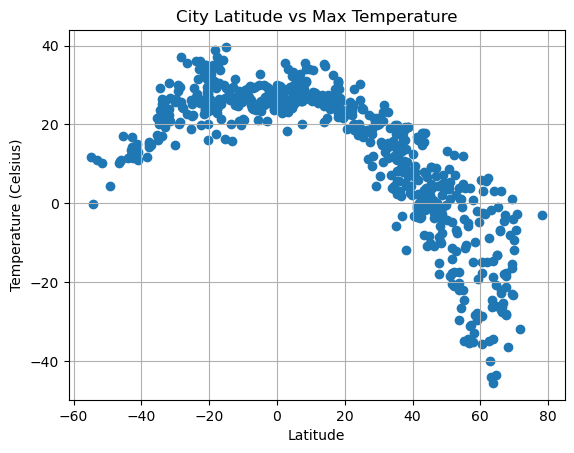

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

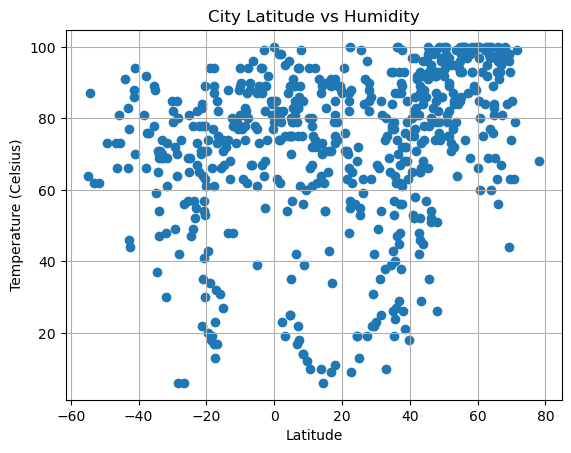

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

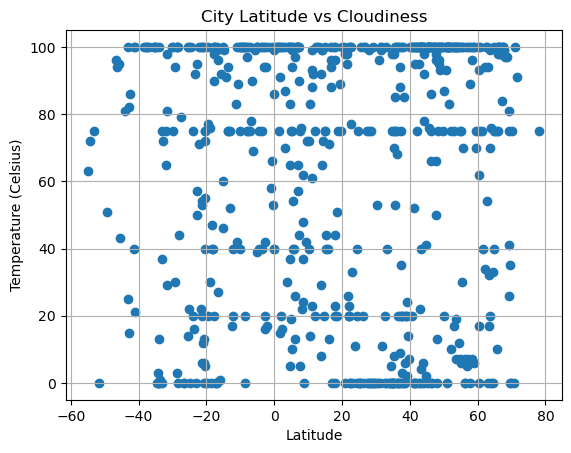

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

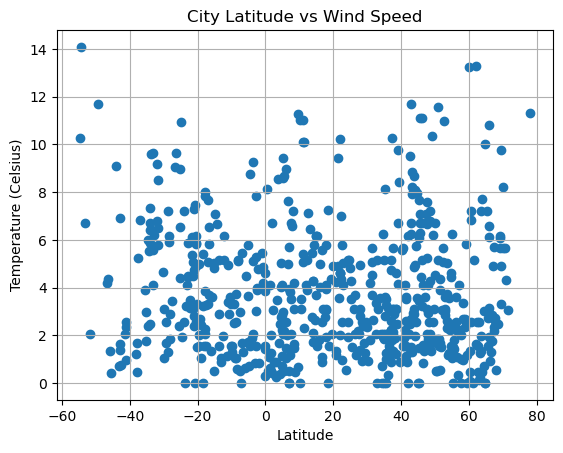

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.7347884785879104


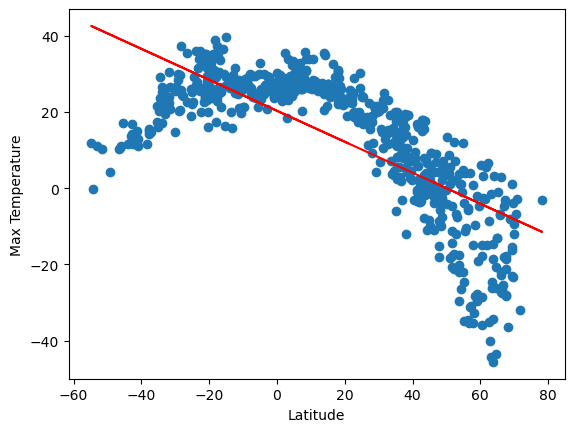

In [17]:
# Define a function to create Linear Regression plots
#####LAT VS MAX TEMP#######
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.2674076266373479


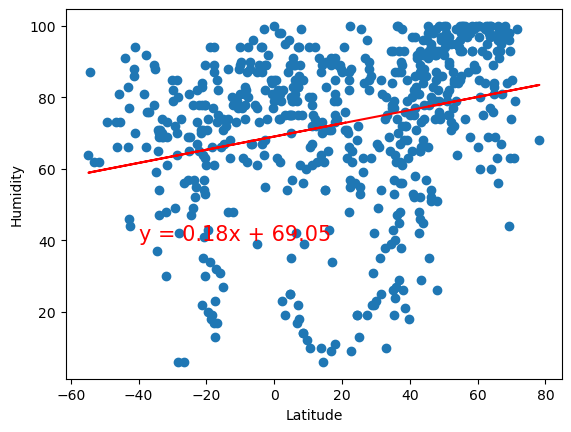

In [18]:
# Define a function to create Linear Regression plots
#####LAT VS Humidity#######
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,haiku-pauwela,20.9219,-156.3051,23.36,76,0,1.34,US,1701954982
2,la passe,45.5549,-0.8967,9.13,78,100,7.09,FR,1701954986
3,klyuchi,52.2667,79.1667,-17.32,73,100,5.08,RU,1701954935
5,serinyol,36.3556,36.2123,14.79,100,75,1.03,TR,1701954996
8,kodiak,57.7900,-152.4072,0.73,69,0,0.00,US,1701955001


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jaciara,-15.9653,-54.9683,36.40,31,1,1.35,BR,1701954985
4,grytviken,-54.2811,-36.5092,-0.12,87,72,14.09,GS,1701954588
6,west island,-12.1568,96.8225,26.99,78,40,5.14,CC,1701954997
7,alofi,-19.0595,-169.9187,24.94,94,30,1.03,NU,1701955000
10,papatowai,-46.5619,169.4708,10.30,73,96,4.17,NZ,1701954596


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.870436833965166


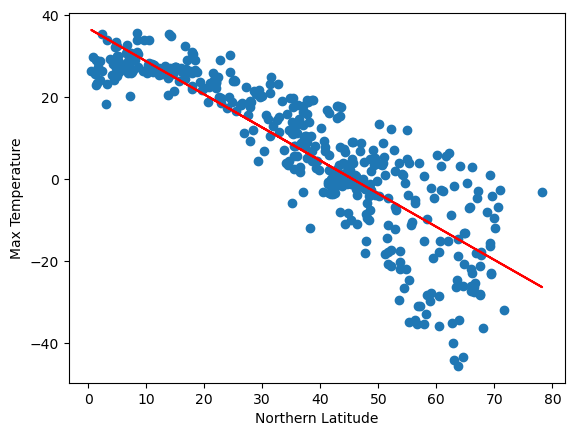

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.5772082740890413


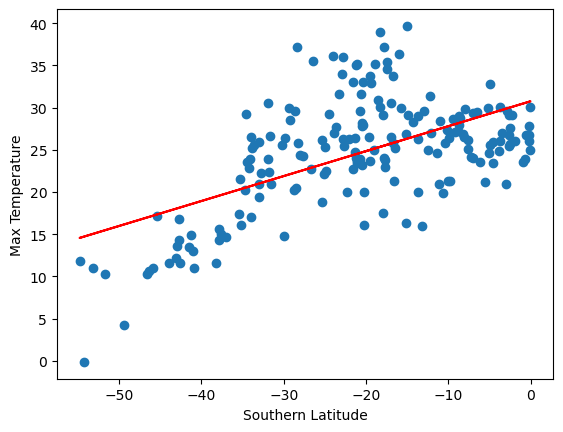

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.33823967050987686


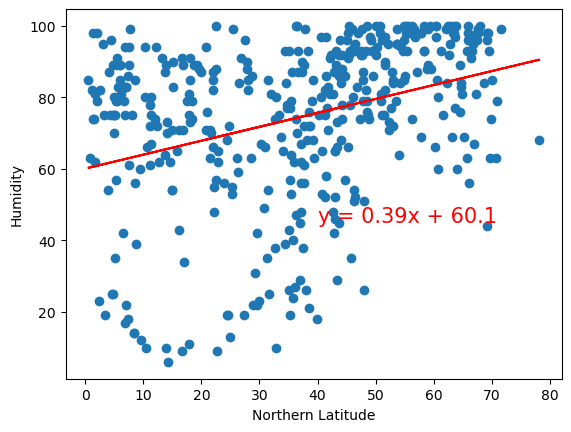

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.15091697867303483


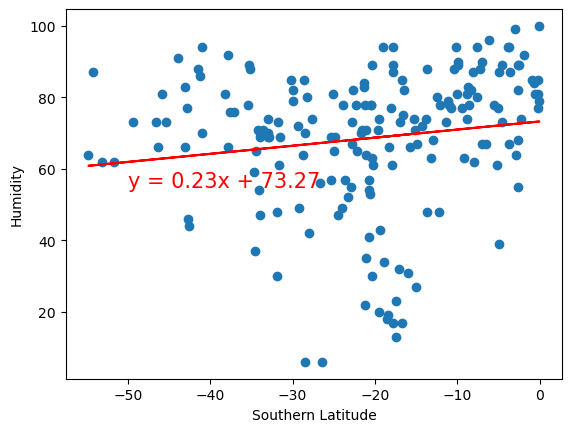

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.059466891558201986


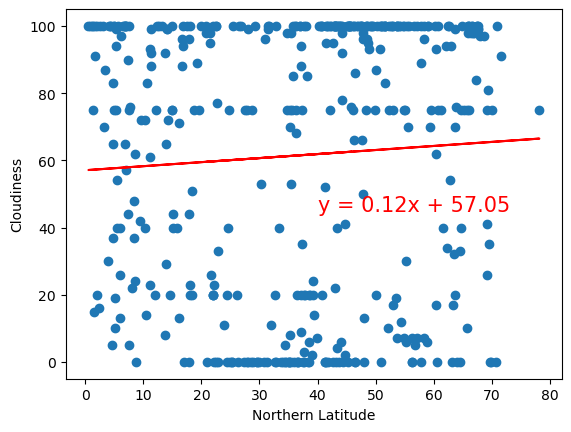

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.09346509503603902


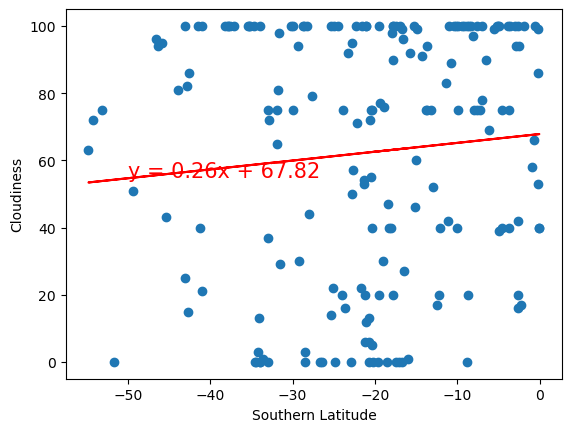

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.016848021915235694


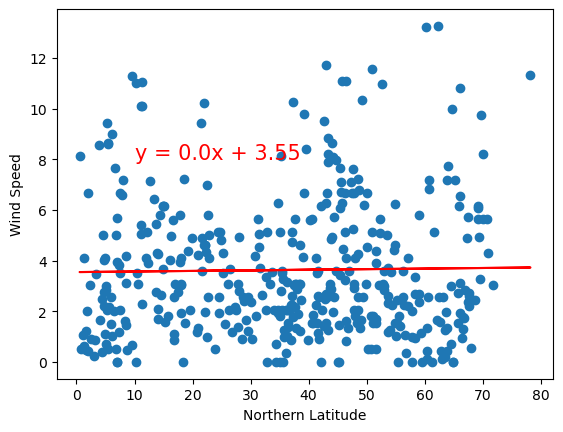

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.23887585575341425


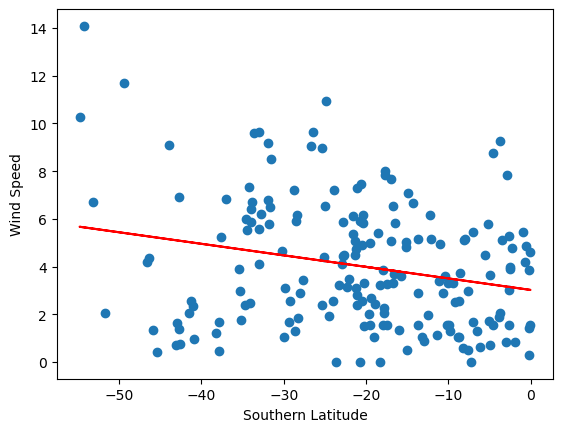

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE